In [1]:
import pandas as pd
import numpy as np

In [2]:
import chardet
with open('shark_attacks.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [3]:
#Get the data
#data_attacks = pd.read_csv('shark_attacks.csv',delimiter=',',header='infer')
data_attacks = pd.read_csv('shark_attacks.csv', encoding='Windows-1252')
data_attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2014.00.00,7/6/1905,2014.0,Boat,NEW ZEALAND,NaN,Stewart Island,Filming a documentary,Dinghy. Occupants: Jeff Kurr and Andy Casagrande,NaN,...,N,NaN,"White shark, 6 m",Discovery Channel,2014.00.00-Jeff-Andy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.00.00,2014.00.00,5646
1,2012.01.02,1/2/2012,2012.0,Unprovoked,AUSTRALIA,Queensland,Duranbah,Spearfishing,Hugo Silva,M,...,N,09h00,Allegedly a 4 m tiger shark,"A. Brenneka, goldcoast.com.au, 1/3/2012",2012.01.02-Hugo-Ricardo-Mendes-da-Silva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.01.02,2012.01.02,5407
2,2012.01.03,1/3/2012,2012.0,Unprovoked,AUSTRALIA,New South Wales,North Avoca Beach,Surfing,Mike Wells,M,...,N,20h00,2 m shark,"Daily Telegraph, 1/3/2012",2012.01.03-Wells.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.01.03,2012.01.03,5408
3,2012.01.13,1/13/2012,2012.0,Unprovoked,USA,Oregon,"Lincoln City, Lincoln County",Surfing,Steve Harnack,M,...,N,NaN,White shark,R. Collier,2012.01.13-Harnack.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.01.13,2012.01.13,5409
4,2012.01.15,1/15/2012,2012.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Swimming,Lungisani Msungubana,M,...,Y,15h40,Thought to involve a bull shark,"News 24, 1/15/2012; R. Bonorchis, Bloomberg Ne...",2012.01.15-Msungubana.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.01.15,2012.01.15,5410


In [4]:
#look the shape
data_attacks.shape

(689, 22)

In [5]:
#have some inside details
data_attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             689 non-null    object 
 1   Date                    689 non-null    object 
 2   Year                    688 non-null    float64
 3   Type                    687 non-null    object 
 4   Country                 688 non-null    object 
 5   Area                    653 non-null    object 
 6   Location                649 non-null    object 
 7   Activity                655 non-null    object 
 8   Name                    682 non-null    object 
 9   Sex                     663 non-null    object 
 10  Age                     528 non-null    object 
 11  Injury                  689 non-null    object 
 12  Fatal (Y/N)             683 non-null    object 
 13  Time                    499 non-null    object 
 14  Species                 439 non-null    ob

In [6]:
#check the null values
data_attacks.isnull().sum()

Case Number                 0
Date                        0
Year                        1
Type                        2
Country                     1
Area                       36
Location                   40
Activity                   34
Name                        7
Sex                        26
Age                       161
Injury                      0
Fatal (Y/N)                 6
Time                      190
Species                   250
Investigator or Source      4
pdf                         0
href formula                0
href                        0
Case Number.1               0
Case Number.2               0
original order              0
dtype: int64

In [7]:
#to see them in context, we can filter the dataframe to include only rows 
#where any of the columns (axis 1 of the DataFrame) are null.

data_novalues = data_attacks[data_attacks.isnull().any(axis=1)]
#data_novalues.head()

In [8]:
#remove 2 columns by position 
df = data_attacks.drop(data_attacks.columns[[1, 8]], axis=1)
df.head(3)

,Case Number,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2014.00.00,2014.0,Boat,NEW ZEALAND,NaN,Stewart Island,Filming a documentary,NaN,NaN,"No injury to occupants, shark nudged and bit boat",N,NaN,"White shark, 6 m",Discovery Channel,2014.00.00-Jeff-Andy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.00.00,2014.00.00,5646
1,2012.01.02,2012.0,Unprovoked,AUSTRALIA,Queensland,Duranbah,Spearfishing,M,34,"No injury, punctures to swim fin",N,09h00,Allegedly a 4 m tiger shark,"A. Brenneka, goldcoast.com.au, 1/3/2012",2012.01.02-Hugo-Ricardo-Mendes-da-Silva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.01.02,2012.01.02,5407
2,2012.01.03,2012.0,Unprovoked,AUSTRALIA,New South Wales,North Avoca Beach,Surfing,M,28,Right forearm and wrist injured,N,20h00,2 m shark,"Daily Telegraph, 1/3/2012",2012.01.03-Wells.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.01.03,2012.01.03,5408


In [9]:
# Remove all columns between column from index 11 to the end
df = df.drop(df.iloc[:, 11:], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  689 non-null    object 
 1   Year         688 non-null    float64
 2   Type         687 non-null    object 
 3   Country      688 non-null    object 
 4   Area         653 non-null    object 
 5   Location     649 non-null    object 
 6   Activity     655 non-null    object 
 7   Sex          663 non-null    object 
 8   Age          528 non-null    object 
 9   Injury       689 non-null    object 
 10  Fatal (Y/N)  683 non-null    object 
dtypes: float64(1), object(10)
memory usage: 59.3+ KB


In [11]:
#check the null values
df.isnull().sum()

Case Number      0
Year             1
Type             2
Country          1
Area            36
Location        40
Activity        34
Sex             26
Age            161
Injury           0
Fatal (Y/N)      6
dtype: int64

In [12]:
#df.isnull().sum()
df.columns

Index(['Case Number', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)'],
      dtype='object')

In [13]:
# Rename multiple columns
df.rename(columns={df.columns[7]: 'Gender', df.columns[10]: 'Fatal'},inplace=True)
print(df.columns)

Index(['Case Number', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Gender', 'Age', 'Injury', 'Fatal'],
      dtype='object')


In [14]:
df = df.rename(columns = {'Case Number': 'Case_Number'})

In [15]:
df.Case_Number.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
684    False
685    False
686    False
687    False
688    False
Name: Case_Number, Length: 689, dtype: bool

In [16]:
#Number of duplicate in column Case_Number
df.Case_Number.duplicated().sum()

3

In [17]:
duplicate = df[df.duplicated('Case_Number')]
#duplicate

In [18]:
df.loc[79, 'Case_Number'] = '2012.09.02.c'
df.loc[181, 'Case_Number'] = '2013.10.05.a'
df.loc[266, 'Case_Number'] = '2014.08.02.b'

In [19]:
df.Case_Number.duplicated().sum()

0

In [20]:
#to see them in context, we can filter the dataframe to include only column
#where any of the columns (axis 1 of the DataFrame) are null.
df_year_null = df[df.Year.isnull()]
df_country_null = df[df.Country.isnull()]
df_type_null = df[df.Type.isnull()]


In [21]:
df_year_null

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
667,2017.01.08.R,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,M,35,"No attack, shark made a threat display",NaN


In [22]:
df_country_null

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
632,2014.08.00,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,M,NaN,Shark involvement prior to death not confirmed,Y


In [23]:
df_type_null

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
399,2015.07.27,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,M,40,Injury to hand,NaN
623,2017.05.27,2017.0,NaN,AUSTRALIA,New South Wales,Evans Head,Fishing,M,73,Abrasion to right forearm from pectoral fin of...,N


In [24]:
#Replace null value by Unknow
df.Type = df.Type.fillna('Unknow')
df.Age = df.Age.fillna('Unknow')
#delete null value in column country
df = df.dropna(subset=['Country'])

In [25]:
#Check if there is still null value
#df.Type.isnull().sum()
df.isnull().sum()

Case_Number     0
Year            1
Type            0
Country         0
Area           35
Location       39
Activity       34
Gender         26
Age             0
Injury          0
Fatal           6
dtype: int64

In [26]:
#print(df_year_null['Case_Number'].str[:4])
year = df_year_null['Case_Number'].str[:4]
year

667    2017
Name: Case_Number, dtype: object

In [27]:
#Replace null value by Unknow
df.Year = df.Year.fillna(year)

In [28]:
#Check if there is still null value
df.isnull().sum()

Case_Number     0
Year            0
Type            0
Country         0
Area           35
Location       39
Activity       34
Gender         26
Age             0
Injury          0
Fatal           6
dtype: int64

In [29]:
df.tail(25)

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
664,2017.05.06.R,2017.0,Provoked,AUSTRALIA,Queensland,Weipa,Attempting to lasso a shark,M,29,Thigh nipped PROVOKED INCIDENT,N
665,2017.06.07.R,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,M,30,"Bruise to leg, cuts to hand sustained when he ...",N
666,2013.08.08.R,2013.0,Unprovoked,SOUTH AFRICA,NaN,NaN,Attempting to free the shark,M,Unknow,"Unknown, but survived",N
667,2017.01.08.R,2017,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,M,35,"No attack, shark made a threat display",NaN
668,2016.07.08.R,2016.0,Unprovoked,SPAIN,Canary Islands,"Las Teresitas, Tenerife",Wading,F,10,"5 tiny puncture marks to lower leg, treated wi...",N
669,2017.03.09,2017.0,Unprovoked,BAHAMAS,Great Exuma,NaN,Washing hands,M,58,Abrasions & lacerations to left leg and hand,N
670,2016.02.10.R,2016.0,Invalid,CAYMAN ISLANDS,Grand Cayman,Stingray City Bar,Feeding stingrays?,M,65,Minor injury to wrist from Southern stingray,N
671,2014.05.10.R,2014.0,Invalid,USA,Florida,"Bethel Shoals, Indian River County",Diving,M,Unknow,No injury. No attack. 12' white shark appeared...,N
672,2016.01.11.R,2016.0,Unprovoked,AUSTRALIA,Queensland,"Happy Valley Beach, Caloundra",Surfing,M,Unknow,Laceration to right foot,N
673,2012.10.11.R,2012.0,Unprovoked,NIGERIA,Delta,Oboro,Bathing,F,38,Laceration to right leg,N


In [30]:
#Change the value to numeric as they are in string. errors = coerce will make non-numeric as NaN
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [31]:
df.dtypes

Case_Number     object
Year            object
Type            object
Country         object
Area            object
Location        object
Activity        object
Gender          object
Age            float64
Injury          object
Fatal           object
dtype: object

In [32]:
#Replace null value by Unknow
df.Age = df.Age.fillna('unknow')
df.Location = df.Location.fillna('unknow')
df.Activity = df.Activity.fillna('unknow')
df.Area = df.Area.fillna('unknow')
df.Injury = df.Injury.fillna('unknow')
df.Gender = df.Gender.fillna('unknow')
df.Injury = df.Injury.fillna('unknow')

In [33]:
#df.Age.values 

In [34]:
# Applying the condition
condition = (df['Fatal'] != 'Y') & (df['Fatal'] != 'N')
df.loc[condition, 'Fatal'] = 'unknow'

In [35]:
#df.Fatal.values

In [36]:
df.isnull().sum()

Case_Number    0
Year           0
Type           0
Country        0
Area           0
Location       0
Activity       0
Gender         0
Age            0
Injury         0
Fatal          0
dtype: int64

In [37]:
from matplotlib import pyplot as plt

In [38]:
case = df.groupby('Gender').Case_Number.nunique()
case
#we can see there are 2 M

Gender
F         127
M         534
M           1
unknow     26
Name: Case_Number, dtype: int64

In [39]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot # plot plotly graphs in line in a notebook
init_notebook_mode(connected = True)
#a pie representing sales by city. This case is in UK
import plotly.express as px # used for interactive visualizations
pie = px.pie(df, values=df['Case_Number'].value_counts(), names='Gender', hole=0.7)

pie.show()
# The graph shows 2 values M which is incorrect. 

In [40]:
#added labels. N/A represents the incorrect M
labels = ['Male', 'Female', 'Unknow', 'N/A']
values = list(df['Gender'].value_counts())
fig1 = go.Figure(data=[
        go.Pie(labels=labels, values=values)
    ])

# displaying the Pie Chart
fig1.show()
#The pie tells us there is 4 values. Instead of 3

In [41]:
#Group to see what is the errors
case = df.groupby('Gender').Case_Number.nunique()
case

Gender
F         127
M         534
M           1
unknow     26
Name: Case_Number, dtype: int64

In [42]:
# Using 'df.Gender.values'  will not be usefull as data very large

In [43]:
# Applying the condition
# filter Multiple Conditions using Multiple Columns
df.loc[(df['Gender'] != 'M') & (df['Gender'] != 'F')  &  (df['Gender'] != 'unknow')]
#The result is unoticable but It is a space before or after M

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
228,2014.04.22,2014.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,M,42.0,Laceration & puncture wounds to right foot,N


In [44]:
#Replace with M without space
df.loc[228, 'Gender'] = 'M'

In [45]:
#correct misspelling
case_updated = df.groupby('Gender').Case_Number.nunique()
case_updated

Gender
F         127
M         535
unknow     26
Name: Case_Number, dtype: int64

In [46]:
dv = df.head(50)
dv.head()

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
0,2014.00.00,2014.0,Boat,NEW ZEALAND,unknow,Stewart Island,Filming a documentary,unknow,unknow,"No injury to occupants, shark nudged and bit boat",N
1,2012.01.02,2012.0,Unprovoked,AUSTRALIA,Queensland,Duranbah,Spearfishing,M,34.0,"No injury, punctures to swim fin",N
2,2012.01.03,2012.0,Unprovoked,AUSTRALIA,New South Wales,North Avoca Beach,Surfing,M,28.0,Right forearm and wrist injured,N
3,2012.01.13,2012.0,Unprovoked,USA,Oregon,"Lincoln City, Lincoln County",Surfing,M,53.0,"No injury, surfboard damaged",N
4,2012.01.15,2012.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Swimming,M,25.0,FATAL,Y


In [47]:
#correct graph
pie = px.pie(df, values=df['Case_Number'].value_counts(), names='Gender', hole=0.7)

pie.show()

In [48]:
dv.head()

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
0,2014.00.00,2014.0,Boat,NEW ZEALAND,unknow,Stewart Island,Filming a documentary,unknow,unknow,"No injury to occupants, shark nudged and bit boat",N
1,2012.01.02,2012.0,Unprovoked,AUSTRALIA,Queensland,Duranbah,Spearfishing,M,34.0,"No injury, punctures to swim fin",N
2,2012.01.03,2012.0,Unprovoked,AUSTRALIA,New South Wales,North Avoca Beach,Surfing,M,28.0,Right forearm and wrist injured,N
3,2012.01.13,2012.0,Unprovoked,USA,Oregon,"Lincoln City, Lincoln County",Surfing,M,53.0,"No injury, surfboard damaged",N
4,2012.01.15,2012.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Swimming,M,25.0,FATAL,Y


In [49]:
df.head(50).groupby(['Year', 'Fatal']).Case_Number.nunique()

Year    Fatal 
2012.0  N         45
        Y          3
        unknow     1
2014.0  N          1
Name: Case_Number, dtype: int64

dv.loc[(dv['Country'] != 'AUSTRALIA')]

In [50]:
pie = px.pie(df, values=df['Case_Number'].value_counts(), names='Fatal', hole=0.7)

pie.show()

In [51]:
country_case = pd.DataFrame(df.groupby("Country") \
["Case_Number"].count()).reset_index().rename({"Case_Number":"Total"},axis=1)

In [52]:
country_case = country_case.sort_values(by=['Total'], ascending=False)

In [53]:
sample = country_case.head(10)
sample

,Country,Total
54,USA,351
2,AUSTRALIA,152
44,SOUTH AFRICA,36
3,BAHAMAS,22
40,REUNION,14
20,FRENCH POLYNESIA,10
45,SPAIN,9
34,NEW ZEALAND,9
5,BRAZIL,8
33,NEW CALEDONIA,8


In [54]:
fig = px.pie(country_case.head(),
             values="Total",
             names="Country",
             title="Total attacks by Country",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

In [55]:
# also drop "Unspecified" and "European Community" since they cannot be mapped
country_case = sample[sample["Country"] \
.isin([ "European Community"]) == False]

In [56]:
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = sample["Country"],
                  locationmode = "country names",
                  z = sample["Total"].astype(float).round(0).tolist(),
                  hovertext = sample["Country"],
                  hovertemplate = "%{hovertext}: %{z:,.0f}cases <extra></extra>",
                  # https://stackoverflow.com/questions/59057881/python-plotly-how-to-customize-hover-template-on-with-what-information-to-show
                  colorbar = {"title" : "Total attacks", },
                ) 

layout = dict(
              title = " Total attacks in Country (Data Sample)",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}  
             )

fig = go.Figure(data=choro_data, layout=layout)
# fig.update_traces(visible = True)
iplot(fig)

In [57]:
df.head(3)

,Case_Number,Year,Type,Country,Area,Location,Activity,Gender,Age,Injury,Fatal
0,2014.00.00,2014.0,Boat,NEW ZEALAND,unknow,Stewart Island,Filming a documentary,unknow,unknow,"No injury to occupants, shark nudged and bit boat",N
1,2012.01.02,2012.0,Unprovoked,AUSTRALIA,Queensland,Duranbah,Spearfishing,M,34.0,"No injury, punctures to swim fin",N
2,2012.01.03,2012.0,Unprovoked,AUSTRALIA,New South Wales,North Avoca Beach,Surfing,M,28.0,Right forearm and wrist injured,N


In [58]:
stat = df[['Gender', 'Fatal']].groupby([ 'Gender', 'Fatal'], as_index = False).value_counts()

In [59]:
stat.value_counts()

Gender  Fatal   count
F       N       114      1
        Y       11       1
        unknow  2        1
M       N       486      1
        Y       44       1
        unknow  5        1
unknow  N       25       1
        unknow  1        1
dtype: int64

In [60]:
cas = df.groupby(['Gender', 'Fatal']).Case_Number.nunique()
cas

Gender  Fatal 
F       N         114
        Y          11
        unknow      2
M       N         486
        Y          44
        unknow      5
unknow  N          25
        unknow      1
Name: Case_Number, dtype: int64

In [61]:
stat = stat.rename(columns = {'count': 'Total'})
stat.value_counts()

Gender  Fatal   Total
F       N       114      1
        Y       11       1
        unknow  2        1
M       N       486      1
        Y       44       1
        unknow  5        1
unknow  N       25       1
        unknow  1        1
dtype: int64

In [62]:
stat

,Gender,Fatal,Total
0,F,N,114
1,F,Y,11
2,F,unknow,2
3,M,N,486
4,M,Y,44
5,M,unknow,5
6,unknow,N,25
7,unknow,unknow,1


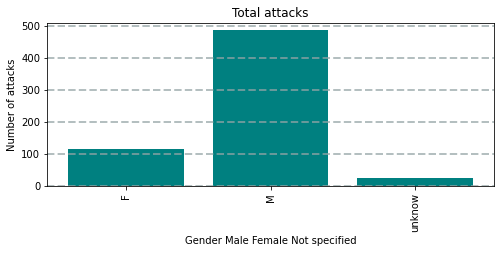

In [63]:
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(stat.Gender, height=stat.Total, color='Teal')

# Customize the chart
plt.title('Total attacks')
plt.xlabel('Gender Male Female Not specified')
plt.ylabel('Number of attacks')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [64]:
 
# plot the dataframe
#stat.plot(x="Gender", y=["Total"], kind="bar", figsize=(9, 8))
 
# print bar graph
#plt.show()

serious = df[df['Fatal'] == 'Y'].value_counts()
minors = df[df['Fatal'] == 'N'].value_counts
no_infos = df[df['Fatal'] == 'unknow'].value.counts()

In [65]:
stat

,Gender,Fatal,Total
0,F,N,114
1,F,Y,11
2,F,unknow,2
3,M,N,486
4,M,Y,44
5,M,unknow,5
6,unknow,N,25
7,unknow,unknow,1


In [66]:
# Applying the condition
cm1 = (stat['Fatal'] == 'Y') & (stat['Gender'] == 'M')
cm2 = (stat['Fatal'] == 'N') & (stat['Gender'] == 'M')
cm3 = (stat['Fatal'] == 'unkow') & (stat['Gender'] == 'M')
cf1 = (stat['Fatal'] == 'Y') & (stat['Gender'] == 'F')
cf2 = (stat['Fatal'] == 'N') & (stat['Gender'] == 'F')
cf3 = (stat['Fatal'] == 'unkow') & (stat['Gender'] == 'F')
cu1 = (stat['Fatal'] == 'Y') & (stat['Gender'] == 'unknow')
cu2 = (stat['Fatal'] == 'N') & (stat['Gender'] == 'unknow')
cu3 = (stat['Fatal'] == 'unkow') & (stat['Gender'] == 'unknow')

In [67]:
stat['Serious'] = np.where(cm1 | cf1 | cu1, stat['Total'], 0)
stat['Minors'] = np.where(cm2 | cf2 | cu2, stat['Total'], 0)
stat['No_Infos'] = np.where(cu1 | cu2 | cu3, stat['Total'], 0)

In [68]:
stat

,Gender,Fatal,Total,Serious,Minors,No_Infos
0,F,N,114,0,114,0
1,F,Y,11,11,0,0
2,F,unknow,2,0,0,0
3,M,N,486,0,486,0
4,M,Y,44,44,0,0
5,M,unknow,5,0,0,0
6,unknow,N,25,0,25,25
7,unknow,unknow,1,0,0,0


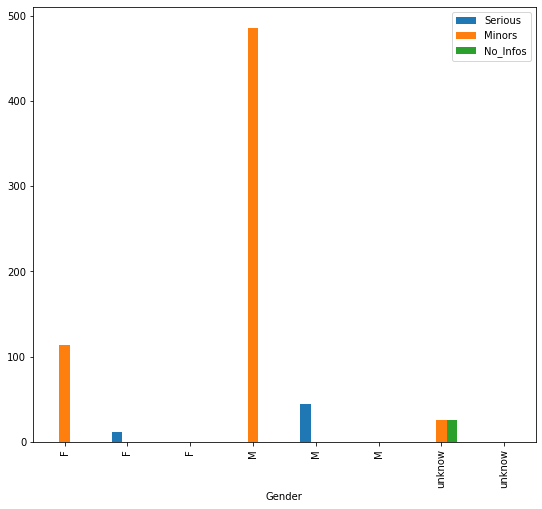

In [69]:
# plot the dataframe
stat.plot(x="Gender", y=["Serious", 'Minors', 'No_Infos'], kind="bar", figsize=(9, 8))
#print bar graph
plt.show()

In [70]:
stat_country = df[['Country', 'Fatal']].groupby([ 'Country', 'Fatal'], as_index = False).value_counts()

In [71]:
stat_country = stat_country.rename(columns = {'count': 'Total'})

In [72]:
stat_country.value_counts()

Country      Fatal   Total
ARUBA        Y       1        1
MAURITIUS    Y       1        1
REUNION      Y       7        1
             N       7        1
PUERTO RICO  N       1        1
                             ..
FRANCE       N       2        1
FIJI         N       2        1
England      N       1        1
EGYPT        Y       1        1
USA          unknow  2        1
Length: 73, dtype: int64

In [73]:
stat_country['Serious'] = np.where((stat_country['Fatal'] == 'Y'), stat_country['Total'], 0)
stat_country['Minors'] = np.where((stat_country['Fatal'] == 'N'), stat_country['Total'], 0)
stat_country['No_Infos'] = np.where((stat_country['Fatal'] == 'unknow'), stat_country['Total'], 0)

In [74]:
sampl = stat_country.head(15)

In [75]:
sampl

,Country,Fatal,Total,Serious,Minors,No_Infos
0,ARUBA,Y,1,1,0,0
1,ATLANTIC OCEAN,N,1,0,1,0
2,AUSTRALIA,N,132,0,132,0
3,AUSTRALIA,Y,17,17,0,0
4,AUSTRALIA,unknow,3,0,0,3
5,BAHAMAS,N,21,0,21,0
6,BAHAMAS,Y,1,1,0,0
7,BELIZE,N,1,0,1,0
8,BRAZIL,N,5,0,5,0
9,BRAZIL,Y,3,3,0,0


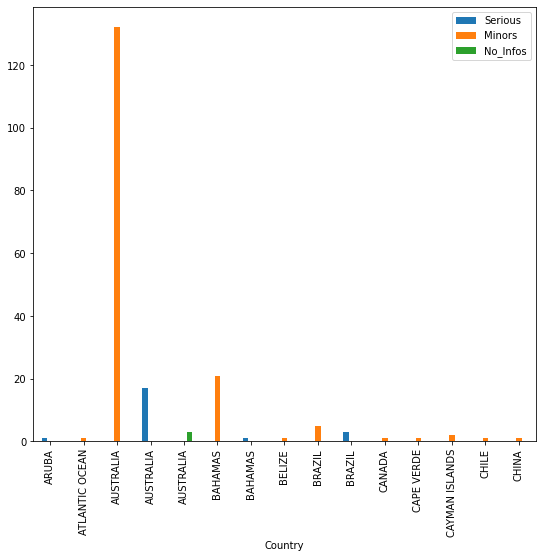

In [76]:
# plot the dataframe
sampl.plot(x="Country", y=["Serious", 'Minors', 'No_Infos'], kind="bar", figsize=(9, 8))
#print bar graph
plt.show()